This notebook involves answering some `Research Questions` from data extraction and understanding the profitable policy for stakeholders. This understanding will be used to forecast using the time series prediction models
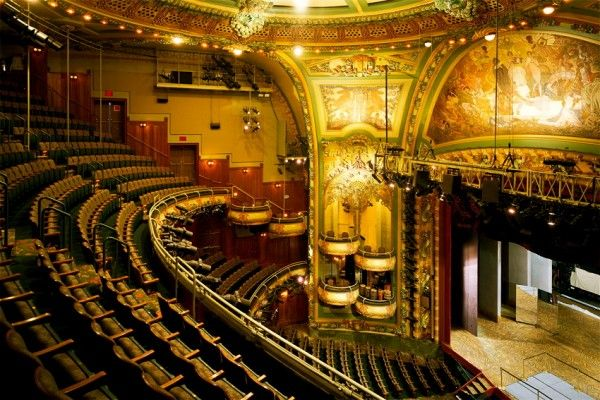

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import set_style
set_style('whitegrid')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
gross_data = pd.read_csv('https://raw.githubusercontent.com/tacookson/data/master/broadway-grosses/grosses.csv',parse_dates = ['week_ending'])
show_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/show_info_1985-2019.csv')
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])

In [3]:
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])
CPI_data.rename(columns = {'CWSR0000SA0':'CPI'}, inplace = True)
gross_data['year'] = gross_data['week_ending'].dt.year
gross_data['month_c'] = [d.strftime('%b') for d in gross_data.week_ending]
gross_data['month'] = gross_data['week_ending'].dt.month
CPI_data['year'] = CPI_data['DATE'].dt.year
CPI_data['month']= CPI_data['DATE'].dt.month
gross_data

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,3915937.00,42nd Street,St. James Theatre,282368.00,NaN,30.42,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,3915937.00,A Chorus Line,Sam S. Shubert Theatre,222584.00,NaN,27.25,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,3915937.00,Aren't We All?,Brooks Atkinson Theatre,249272.00,NaN,33.75,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,3915937.00,Arms and the Man,Circle in the Square Theatre,95688.00,NaN,20.87,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,3915937.00,As Is,Lyceum Theatre,61059.00,NaN,20.78,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,26109896.25,The Phantom of the Opera,Majestic Theatre,639215.93,1358986.0,72.18,213.0,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,26109896.25,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1320766.00,1566688.0,132.02,297.0,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,26109896.25,To Kill A Mockingbird,Sam S. Shubert Theatre,1132278.54,1549625.0,115.41,423.0,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,26109896.25,West Side Story,Broadway Theatre,1598947.32,1722464.0,114.87,373.0,13920,1740,1.0000,8,0,2020,Mar,3


In [4]:
CPI_data['CPI'] = CPI_data.iloc[-1]['CPI']/CPI_data['CPI']
CPI_data

,DATE,CPI,year,month
0,1947-01-01,13.148889,1947,1
1,1947-02-01,13.064213,1947,2
2,1947-03-01,12.839783,1947,3
3,1947-04-01,12.839783,1947,4
4,1947-05-01,12.863043,1947,5
...,...,...,...,...
899,2021-12-01,1.031327,2021,12
900,2022-01-01,1.024507,2022,1
901,2022-02-01,1.015750,2022,2
902,2022-03-01,1.001908,2022,3


In [5]:
CPI_data2 = CPI_data[['CPI','month','year']]
gross_data2 = gross_data.merge(CPI_data2, how = 'left', on = ['month', 'year'])
gross_data['weekly_gross_overall'] = gross_data2['weekly_gross_overall']*gross_data2['CPI']
gross_data['weekly_gross'] = gross_data2['weekly_gross']*gross_data2['CPI']
gross_data['avg_ticket_price'] = gross_data2['avg_ticket_price']*gross_data2['CPI']
gross_data['potential_gross'] = gross_data2['potential_gross']*gross_data2['CPI']
gross_data['top_ticket_price']= gross_data2['top_ticket_price']*gross_data2['CPI']
gross_data['year']=gross_data.year.astype(int).astype(str)
gross_data

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,1.040401e+07,42nd Street,St. James Theatre,7.502061e+05,NaN,80.821017,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,1.040401e+07,A Chorus Line,Sam S. Shubert Theatre,5.913697e+05,NaN,72.398840,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,1.040401e+07,Aren't We All?,Brooks Atkinson Theatre,6.622754e+05,NaN,89.668288,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,1.040401e+07,Arms and the Man,Circle in the Square Theatre,2.542275e+05,NaN,55.448213,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,1.040401e+07,As Is,Lyceum Theatre,1.622239e+05,NaN,55.209097,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,2.949006e+07,The Phantom of the Opera,Majestic Theatre,7.219681e+05,1.534919e+06,81.524345,240.574751,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,2.949006e+07,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1.491751e+06,1.769510e+06,149.111167,335.449300,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,2.949006e+07,To Kill A Mockingbird,Sam S. Shubert Theatre,1.278862e+06,1.750238e+06,130.350854,477.761125,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,2.949006e+07,West Side Story,Broadway Theatre,1.805945e+06,1.945452e+06,129.740947,421.288179,13920,1740,1.0000,8,0,2020,Mar,3


### Which show has highest weekly gross overall?


In [6]:
nc,vc=[],[]
gross_data['show'].value_counts()
for i in gross_data['show'].value_counts().index:
    nc.append(i)
    vc.append(gross_data[gross_data['show']==i].weekly_gross_overall.sum())
    #print(i,gross_data[gross_data['show']==i].weekly_gross_overall.sum())
show_gross = pd.DataFrame({'Show_name':nc,'Gross':vc})
show_gross.sort_values(by='Gross',ascending=False)

,Show_name,Gross
0,The Phantom of the Opera,3.815936e+10
1,Chicago,3.219823e+10
2,The Lion King,3.129438e+10
5,Wicked,2.492642e+10
3,Les Miserables,1.915208e+10
...,...,...
1120,"Men Are from Mars, Women Are from Venus",1.434698e+07
1106,Raffi,1.400999e+07
1113,Broadway,1.225468e+07
1117,Senator Joe,1.116221e+07


`Phantom of the Opera` has earned the great attraction from the people. Trying to understand more on this
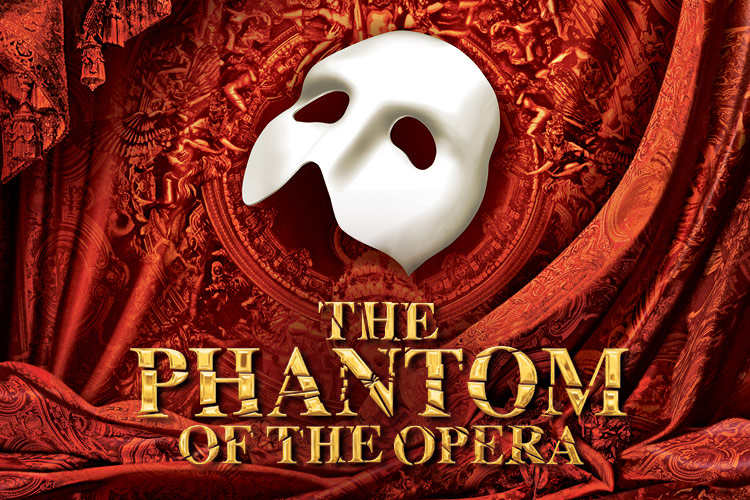

In [8]:
gross_data[gross_data['show']=='The Phantom of the Opera']

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
2718,1988-01-10,32,1.086062e+07,The Phantom of the Opera,Majestic Theatre,1.765282e+05,NaN,111.377852,NaN,1585,1609,0.9851,0,1,1988,Jan,1
2737,1988-01-17,33,1.170789e+07,The Phantom of the Opera,Majestic Theatre,1.116376e+06,NaN,100.482731,NaN,11109,1609,0.9863,0,7,1988,Jan,1
2756,1988-01-24,34,1.090169e+07,The Phantom of the Opera,Majestic Theatre,1.077847e+06,NaN,98.675132,NaN,10924,1609,0.9699,0,7,1988,Jan,1
2775,1988-01-31,35,1.104168e+07,The Phantom of the Opera,Majestic Theatre,1.152521e+06,NaN,95.456119,NaN,12075,1609,0.9381,7,1,1988,Jan,1
2793,1988-02-07,36,9.782698e+06,The Phantom of the Opera,Majestic Theatre,1.196417e+06,NaN,91.359716,NaN,13094,1609,1.0172,8,0,1988,Feb,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47412,2020-02-02,36,2.930169e+07,The Phantom of the Opera,Majestic Theatre,8.341990e+05,1.529439e+06,84.204408,239.715838,9907,1605,0.7716,8,0,2020,Feb,2
47438,2020-02-09,37,3.035429e+07,The Phantom of the Opera,Majestic Theatre,8.262196e+05,1.529439e+06,82.336200,239.715838,10035,1605,0.7815,8,0,2020,Feb,2
47465,2020-02-16,38,3.505991e+07,The Phantom of the Opera,Majestic Theatre,1.093842e+06,1.545274e+06,103.527981,277.980338,10566,1605,0.8229,8,0,2020,Feb,2
47491,2020-02-23,39,3.285785e+07,The Phantom of the Opera,Majestic Theatre,9.457381e+05,1.529439e+06,88.492283,277.980338,10687,1605,0.8323,8,0,2020,Feb,2


Text(0, 0.5, 'Weekly Gross(Overall)')

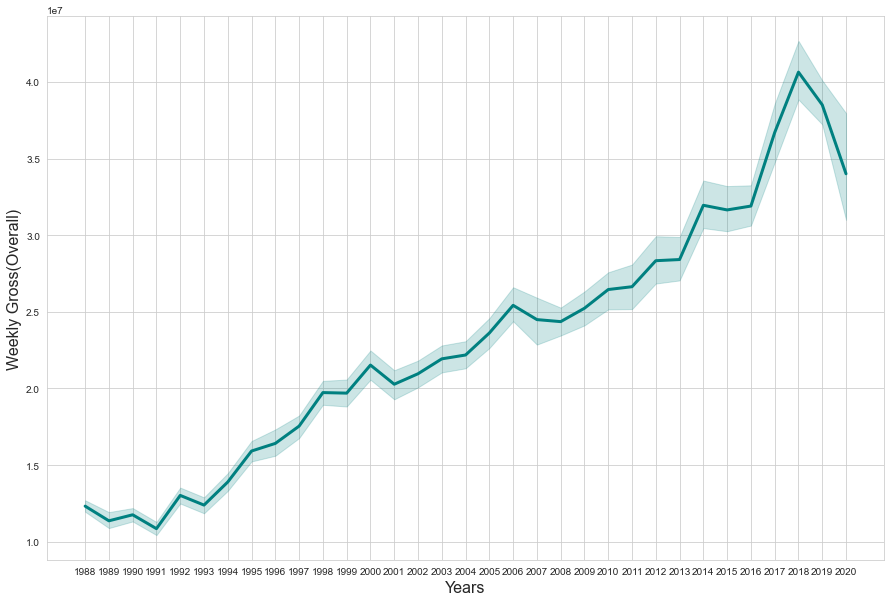

In [9]:
sns.lineplot(x=gross_data[gross_data['show']=='The Phantom of the Opera']['year'],y=gross_data[gross_data['show']=='The Phantom of the Opera']['weekly_gross_overall'],color="teal",linewidth="3")
plt.xlabel('Years',fontsize=16)
plt.ylabel('Weekly Gross(Overall)',fontsize=16)

Text(0, 0.5, 'Weekly Gross(Overall)')

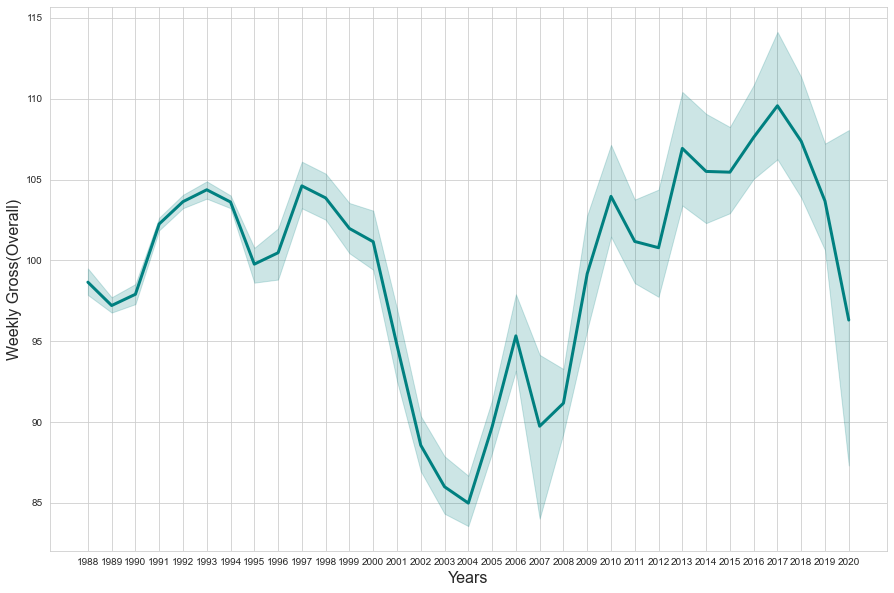

In [10]:
sns.lineplot(x=gross_data[gross_data['show']=='The Phantom of the Opera']['year'],y=gross_data[gross_data['show']=='The Phantom of the Opera']['avg_ticket_price'],color="teal",linewidth="3")
plt.xlabel('Years',fontsize=16)
plt.ylabel('Weekly Gross(Overall)',fontsize=16)

<AxesSubplot:xlabel='year', ylabel='pct_capacity'>

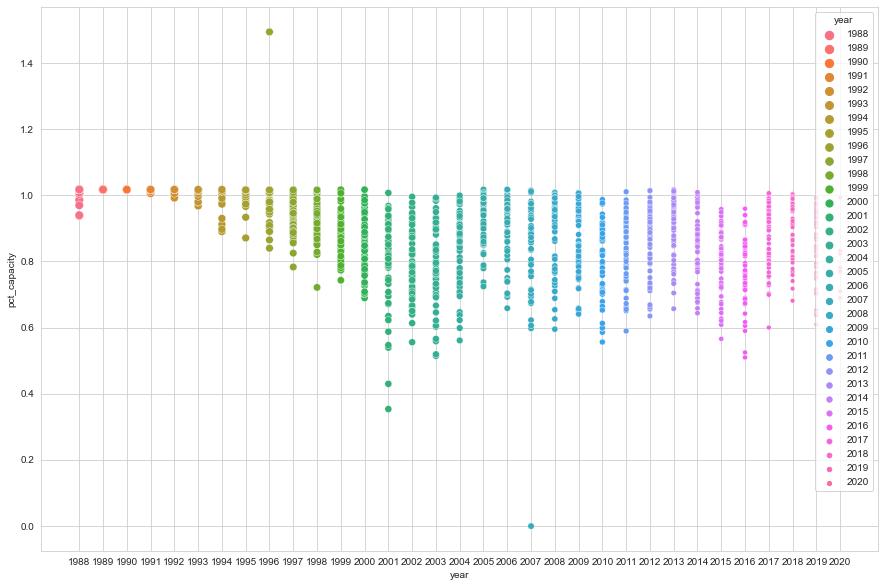

In [25]:
sns.scatterplot(data=gross_data[gross_data['show']=='The Phantom of the Opera'],x='year',y='pct_capacity',hue='year',size='year')

(A) The average ticket price does not much affects the percentage capacity of the show.
There might be two type of audience from the above point
1. The ticket price is in the ambits of afforadability of people.
2. The interested audience is wealthy in nature

<AxesSubplot:xlabel='pct_capacity', ylabel='avg_ticket_price'>

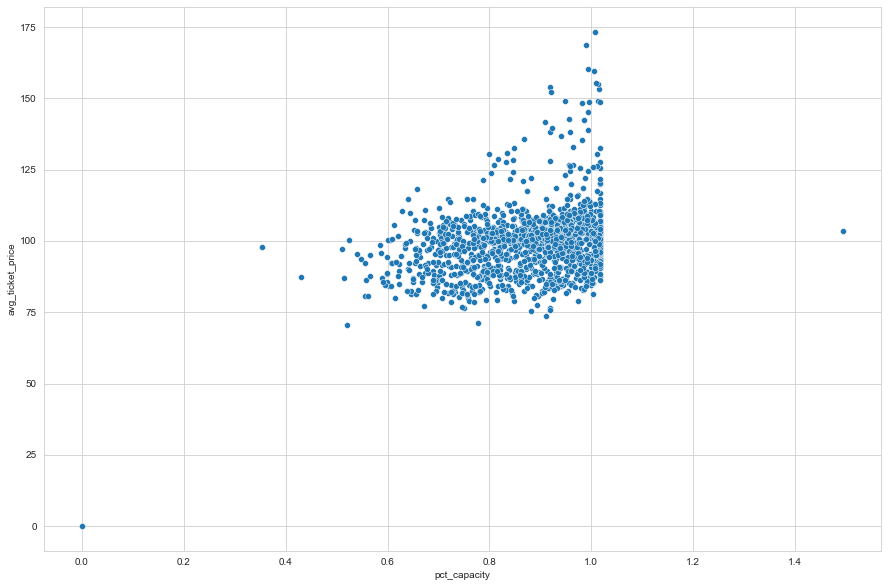

In [26]:
sns.scatterplot(data=gross_data[gross_data['show']=='The Phantom of the Opera'],x='pct_capacity',y='avg_ticket_price')

In [27]:
gross_data['avg_ticket_price'].mean()<gross_data[gross_data['show']=='The Phantom of the Opera']['avg_ticket_price'].mean()

True

The mean price of the average ticket price of the show `The Phantom of the Opera` is greater than the mean average of the ticket price of the entire data